## CNNs for breast cancer detection


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)

We load our data and prepare tha detaset to be trained. Then we print the shapes of the obtained dataset.

In [2]:
from sklearn.model_selection import train_test_split
data_dir= r"C:\...data directory" # Due to the size of the dataset we had to work locally. Replace this line with the proper file path

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
image_size = [64, 64]
batch_size = 256

train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    classes=["0", "1"],
    subset="training",
    shuffle=False
)

num_samples = train_generator.samples

X = []
y = []
for i in range(num_samples // batch_size):
    batch = train_generator.next()
    X.extend(batch[0])
    y.extend(batch[1])
X = np.array(X)
y = np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape[0])

Found 73028 images belonging to 2 classes.
X_train shape: (58368, 64, 64, 3)
y_train shape: (58368,)
X_valid shape: (7296, 64, 64, 3)
y_valid shape: (7296,)
X_test shape: (7296, 64, 64, 3)
y_test shape: 7296


We count the number of samples for each class in the training, validation and test set.

In [3]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
train_class_counts = dict(zip(unique_train, counts_train))
print("Train class counts:", train_class_counts)

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
valid_class_counts = dict(zip(unique_valid, counts_valid))
print("Validation class counts:", valid_class_counts)

unique_test, counts_test = np.unique(y_test, return_counts=True)
test_class_counts = dict(zip(unique_test, counts_test))
print("Test class counts:", test_class_counts)

Train class counts: {0.0: 44768, 1.0: 13600}
Validation class counts: {0.0: 5596, 1.0: 1700}
Test class counts: {0.0: 5596, 1.0: 1700}


Since the data are unbalanced, we reduce the largest class so that the two classes have the same number of data.

In [4]:
min_class_count = min(train_class_counts.values())
min_valid_class_count = min(valid_class_counts.values())
min_test_class_count = min(test_class_counts.values())

X_train_balanced = []
y_train_balanced = []

X_valid_balanced = []
y_valid_balanced = []

X_test_balanced = []
y_test_balanced = []


for class_label in train_class_counts.keys():
    indices = np.where(y_train == class_label)[0]
    selected_indices = np.random.choice(indices, size=min_class_count, replace=False)
    X_train_balanced.extend(X_train[selected_indices])
    y_train_balanced.extend(y_train[selected_indices])
    
for class_label in valid_class_counts.keys():
    indices = np.where(y_valid == class_label)[0]
    selected_indices = np.random.choice(indices, size=min_valid_class_count, replace=False)
    X_valid_balanced.extend(X_valid[selected_indices])
    y_valid_balanced.extend(y_valid[selected_indices])
    
for class_label in test_class_counts.keys():
    indices = np.where(y_test == class_label)[0]
    selected_indices = np.random.choice(indices, size=min_test_class_count, replace=False)
    X_test_balanced.extend(X_test[selected_indices])
    y_test_balanced.extend(y_test[selected_indices])
    

X_train_balanced = np.array(X_train_balanced)
y_train_balanced = np.array(y_train_balanced)

X_valid_balanced = np.array(X_valid_balanced)
y_valid_balanced = np.array(y_valid_balanced)

X_test_balanced = np.array(X_test_balanced)
y_test_balanced = np.array(y_test_balanced)


shuffle_indices = np.random.permutation(len(X_train_balanced))
X_train_balanced = X_train_balanced[shuffle_indices]
y_train_balanced = y_train_balanced[shuffle_indices]

shuffle_indices = np.random.permutation(len(X_valid_balanced))
X_valid_balanced = X_valid_balanced[shuffle_indices]
y_valid_balanced = y_valid_balanced[shuffle_indices]

shuffle_indices = np.random.permutation(len(X_test_balanced))
X_test_balanced = X_test_balanced[shuffle_indices]
y_test_balanced = y_test_balanced[shuffle_indices]


print("X_train_balanced shape:", X_train_balanced.shape)
print("y_train_balanced shape:", y_train_balanced.shape)

print("X_valid_balanced shape:", X_valid_balanced.shape)
print("y_valid_balanced shape:", y_valid_balanced.shape)

print("X_test_balanced shape:", X_test_balanced.shape)
print("y_test_balanced shape:", y_test_balanced.shape)

X_train_balanced shape: (27200, 64, 64, 3)
y_train_balanced shape: (27200,)
X_valid_balanced shape: (3400, 64, 64, 3)
y_valid_balanced shape: (3400,)
X_test_balanced shape: (3400, 64, 64, 3)
y_test_balanced shape: (3400,)


We count the number of samples for each class (now balanced) in the training, validation and test set

In [5]:
unique_train, counts_train = np.unique(y_train_balanced, return_counts=True)
train_class_counts = dict(zip(unique_train, counts_train))
print("Train class counts:", train_class_counts)

unique_valid, counts_valid = np.unique(y_valid_balanced, return_counts=True)
valid_class_counts = dict(zip(unique_valid, counts_valid))
print("Validation class counts:", valid_class_counts)

unique_test, counts_test = np.unique(y_test_balanced, return_counts=True)
test_class_counts = dict(zip(unique_test, counts_test))
print("Test class counts:", test_class_counts)

Train class counts: {0.0: 13600, 1.0: 13600}
Validation class counts: {0.0: 1700, 1.0: 1700}
Test class counts: {0.0: 1700, 1.0: 1700}


Let's take a look at the sample of the images in our dataset.

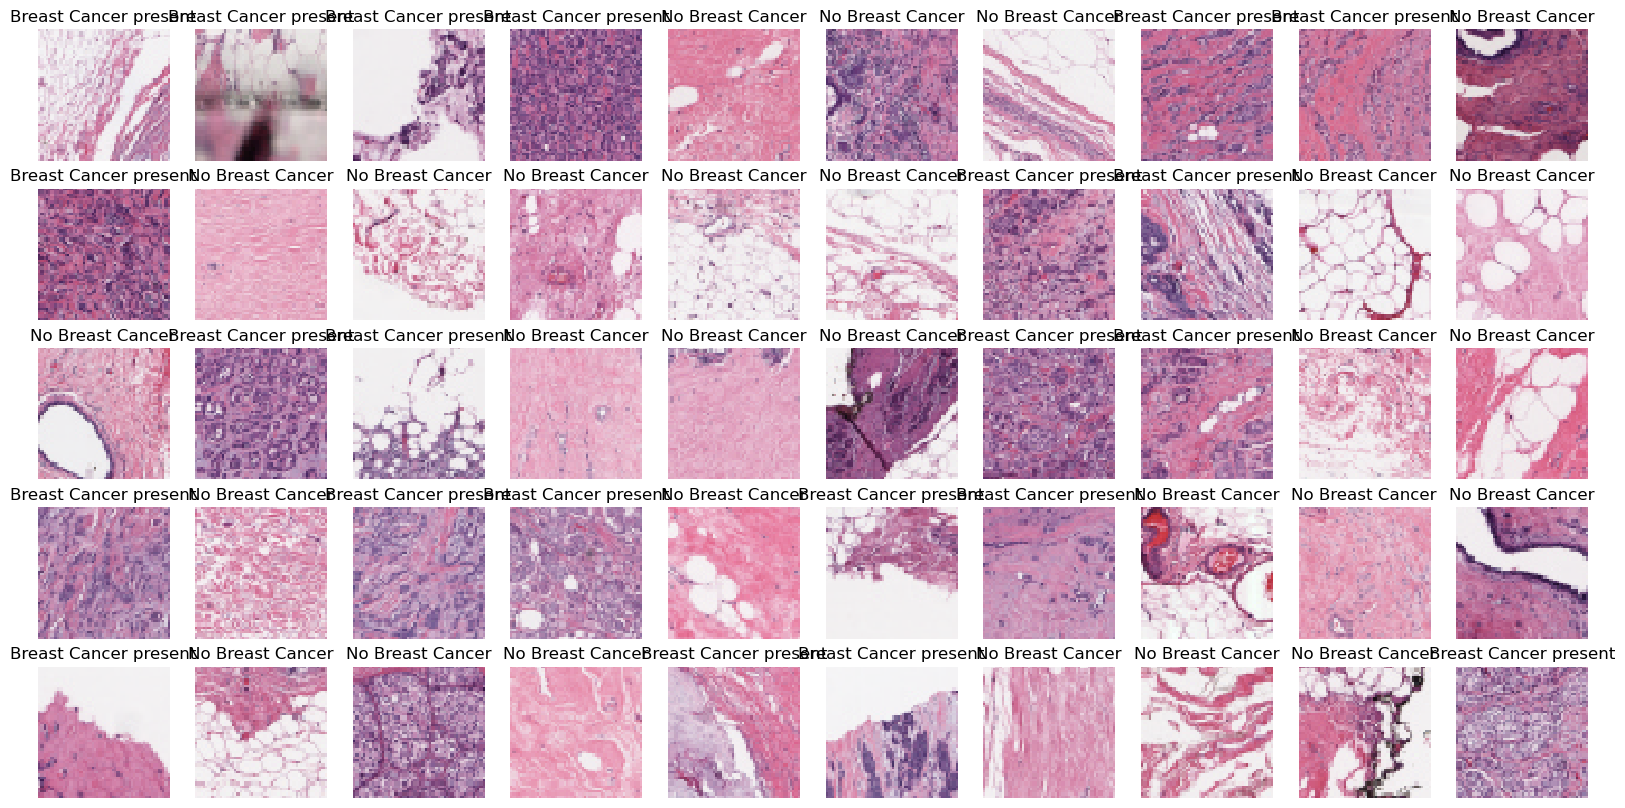

In [6]:
n_rows = 5
n_cols = 10
class_names = ["No Breast Cancer", "Breast Cancer present"]
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_balanced[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        if y_train_balanced[index] == 0.0:
            plt.title(class_names[0])
        else:
            plt.title(class_names[1])
                
plt.show()

We standardize the pixel values so that all the features have a similar scale.

In [7]:
mean = np.mean(X_train_balanced, axis=0)
std = np.std(X_train_balanced, axis=0)
X_train_balanced = ( X_train_balanced - mean ) / std
X_valid_balanced = ( X_valid_balanced - mean ) / std
X_test_balanced = ( X_test_balanced - mean ) / std


#### Now we can build the model. 

We firstly initialize a sequential model, which is a linear stack of layers.
We add the first convolutional layer to the model. It takes an input of shape (64, 64, 3) corresponding to images with a height and width of 64 pixels and 3 color channels (RGB). The layer applies first_filters number of filters using the kernel_size, and the activation function used is ReLU.
We then add another convolutional layer with the same number of filters and kernel size.
We performe max pooling with the specified pool_size to downsample the feature maps and apply dropout regularization after each convolutional layer to reduce overfitting.
This pattern of adding convolutional, pooling, and dropout layers is repeated twice more with second_filters and third_filters to capture increasingly complex features.
After that, we flatten the output from the previous convolutional layers into a 1-dimensional vector, preparing it for input to a fully connected layer.
We add a fully connected (dense) layer with 256 units and ReLU activation function and applied dropout regularization to the output of the dense layer.
In the end, we add the final dense layer with 2 units, representing the number of classes to be predicted (binary classification). As activation function, we choose softmax, which produces probabilities for each class.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

kernel_size = (3, 3)
pool_size = (2, 2)
first_filters = 32
second_filters = 64
third_filters = 128
dropout_conv = 0.3
dropout_dense = 0.3

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(first_filters, kernel_size, activation='relu'))
model.add(Conv2D(first_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 64)        18496     
                                                        

In [9]:
from keras.utils import to_categorical

# We convert target labels to one-hot encoded format
y_train_balanced_encoded = to_categorical(y_train_balanced, num_classes=2)
y_valid_balanced_encoded = to_categorical(y_valid_balanced, num_classes=2)
y_test_balanced_encoded = to_categorical(y_test_balanced, num_classes=2)

In [11]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_balanced, y_train_balanced_encoded, epochs=20,
                    validation_data=(X_valid_balanced, y_valid_balanced_encoded))

Epoch 1/20
850/850 [==============================] - 464s 543ms/step - loss: 0.3219 - accuracy: 0.8704 - val_loss: 0.3254 - val_accuracy: 0.8668
Epoch 2/20
850/850 [==============================] - 456s 536ms/step - loss: 0.3220 - accuracy: 0.8707 - val_loss: 0.3320 - val_accuracy: 0.8650
Epoch 3/20
850/850 [==============================] - 454s 534ms/step - loss: 0.3159 - accuracy: 0.8737 - val_loss: 0.3436 - val_accuracy: 0.8588
Epoch 4/20
850/850 [==============================] - 452s 532ms/step - loss: 0.3157 - accuracy: 0.8748 - val_loss: 0.3581 - val_accuracy: 0.8532
Epoch 5/20
850/850 [==============================] - 451s 530ms/step - loss: 0.3180 - accuracy: 0.8724 - val_loss: 0.3371 - val_accuracy: 0.8576
Epoch 6/20
850/850 [==============================] - 451s 531ms/step - loss: 0.3149 - accuracy: 0.8732 - val_loss: 0.3294 - val_accuracy: 0.8626
Epoch 7/20
850/850 [==============================] - 452s 532ms/step - loss: 0.3165 - accuracy: 0.8712 - val_loss: 0.3322 -

We now calculate and plot the confusion matrix.

107/107 [==============================] - 11s 99ms/step


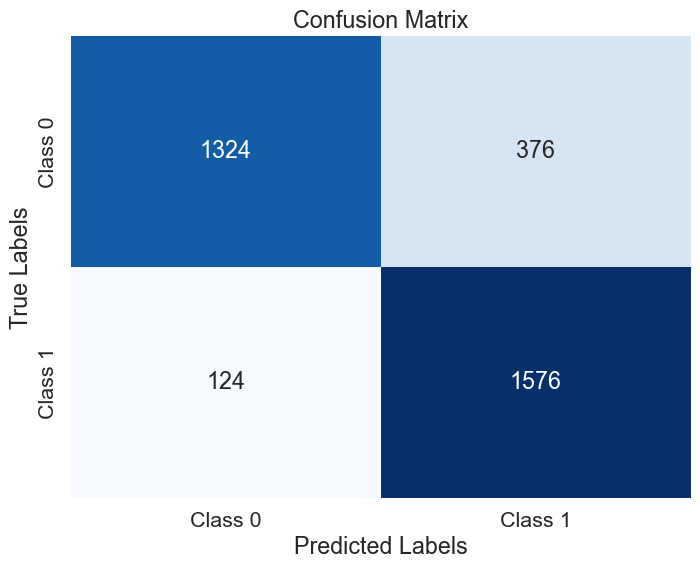

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_valid_balanced)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_valid_balanced_encoded, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## ResNet-32

Here is a sketch of how we could implement ResNet-32 for our classification problem (the presented code doesn't involve the use of FastAI). 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet32
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

base_model = ResNet32(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid_balanced, y_valid_balanced), epochs=50)

test_loss, test_accuracy = model.evaluate(X_test_balanced, y_test_balanced)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)